# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Grouping and Summarizing Data

Previously we were able to merge two DataFrames. Another type of wrangling we would want to do is to group rows of data and perform operations on the group. This is done using groupby statements. 


## The Superstore dataset

Previously we have merged the Orders and Products tables to create a new dataset called orders_by_product.csv.

This is the dataset that we will read in, let's call it `merged` as we did previously.

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read in the dataset


In [2]:
# read in the orders dataset
merged = pd.read_csv('datasets/orders_by_product.csv')

In [3]:
# Check the first 5 rows
merged.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,...,category,sub_category,description,unit_cost,days_to_ship,order_year,order_month_no,order_day,order_day_name,margin_category
0,ID-2022-83625,2022-07-28,2022-07-31,Second Class,RS-19420,FUR-BO-10000008,465.156,2,0.400000,-255.864,...,Furniture,Bookcases,"Sauder Library with Doors, Traditional",360.51,3,2022,7,3,Thursday,Low
1,IN-2020-85480,2020-07-31,2020-02-08,First Class,CS-12490,FUR-BO-10000021,243.060,2,0.149847,102.060,...,Furniture,Bookcases,"Dania Corner Shelving, Metal",70.50,-174,2020,7,4,Friday,High
2,IN-2020-21206,2020-07-02,2020-12-02,Standard Class,SC-20800,FUR-BO-10000035,1236.330,3,0.000000,519.210,...,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,153,2020,7,3,Thursday,High
3,IN-2019-50060,2019-07-09,2019-09-14,Standard Class,MC-17575,FUR-BO-10000035,2472.660,6,0.149847,1038.420,...,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,67,2019,7,1,Tuesday,High
4,IN-2019-25889,2019-08-12,2019-12-12,Standard Class,BP-11185,FUR-BO-10000035,2596.293,7,0.100000,923.013,...,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,122,2019,8,0,Monday,High


In [4]:
# Check the columns
merged.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'product_id', 'sales', 'quantity', 'discount', 'profit',
       'profit_margin', 'category', 'sub_category', 'description', 'unit_cost',
       'days_to_ship', 'order_year', 'order_month_no', 'order_day',
       'order_day_name', 'margin_category'],
      dtype='object')

Great! Now we can analyse the data by **splitting** the data by `category`, `sub_category`, `year`, `month` and even the `order_day`.


## Split-Apply-Combine

---

What if we want summary statistics _with respect to some categorical variable?_ To tackle this problem, we'll use the **Split-Apply-Combine** technique. 

* **Split**: Separate your data into different DataFrames, one for each category.
* **Apply**: On each split-up DataFrame, apply some function or transformation (for example, the mean).
* **Combine**: Take the results and combine the split-up DataFrames back into one aggregate DataFrame.

This might sound complicated, but it's actually only two commands in `pandas` (the **Combine** step is done for us).

- First, we use the `groupby()` statements to segment our data to a specific subsets.
- Then, we apply the function that we want to use.

The result will be the list of groups that we have specified, with the calculated value for each group. 


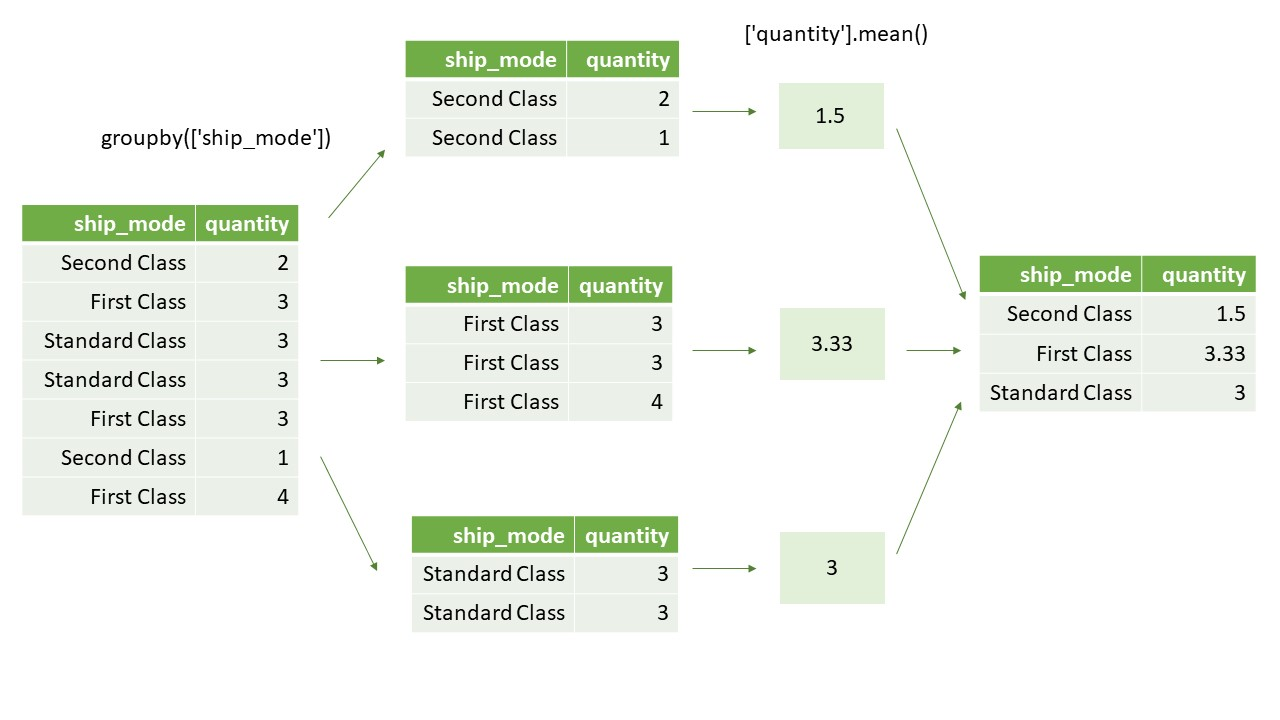



Let's try it out!

In [5]:
# If we just want to count the number of rows in the 'order_id' row
merged['order_id'].count()

10923

Let's group by `ship_mode`, and get a count of orders for each ship mode.

In [6]:
# Counting AFTER we group by ship mode
merged.groupby('ship_mode')['order_id'].count()

ship_mode
First Class       1576
Same Day           533
Second Class      2199
Standard Class    6615
Name: order_id, dtype: int64

In [7]:
# Is this similar to value_counts()? What's the difference?
merged['ship_mode'].value_counts()

Standard Class    6615
Second Class      2199
First Class       1576
Same Day           533
Name: ship_mode, dtype: int64

We can see that the value_counts() is also counting by groups, and sorts by the highest value, but groupby() sorts the results in alphabetical order of the groups by default. 

However, using groupby, we can get *other* aggregated values by category, such as the *max*, *min*, *mean*, etc.


Let's find out the highest sales amount for each ship mode:

In [8]:
# find the max sales by ship mode, return as a Series
merged.groupby('ship_mode')['sales'].max()

ship_mode
First Class       5175.1710
Same Day          3741.5238
Second Class      5667.8700
Standard Class    6998.6400
Name: sales, dtype: float64

In [9]:
merged.groupby('category')['profit'].sum()

category
Furniture          124307.9205
Office Supplies    104547.6715
Technology         201658.5060
Name: profit, dtype: float64

In [10]:
# find the mean values for all other columns in the DataFrame by ship mode
merged.groupby('ship_mode').mean()

,sales,quantity,discount,profit,profit_margin,unit_cost,days_to_ship,order_year,order_month_no,order_day
ship_mode,,,,,,,,,,
First Class,316.308534,3.704949,0.155368,36.882062,0.059780,76.703680,2.384518,2020.743655,6.984137,3.106599
Same Day,303.988495,3.696060,0.151219,34.858326,0.080713,72.792664,0.921201,2020.718574,6.923077,3.001876
Second Class,309.648138,3.731241,0.144770,34.867296,0.078786,73.576548,4.096407,2020.828558,6.989995,3.044111
Standard Class,335.623751,3.776871,0.150108,41.894980,0.066416,77.985351,6.268027,2020.775208,7.111716,3.132426


#### Quick Exercise

Find the sum of profit for each ship_mode for all orders.

In [11]:
# return a series
merged.groupby('ship_mode')['profit'].sum()

ship_mode
First Class        58126.1292
Same Day           18579.4878
Second Class       76673.1850
Standard Class    277135.2960
Name: profit, dtype: float64

#### Multiple Aggregations On the Same Column

We can also use the `.agg()` method with multiple arguments, to simulate a `.describe()` method like we used before:

In [12]:
merged.groupby('ship_mode')['sales'].agg(['count','mean','min','max'])

,count,mean,min,max
ship_mode,,,,
First Class,1576,316.308534,4.4100,5175.1710
Same Day,533,303.988495,6.5400,3741.5238
Second Class,2199,309.648138,2.8800,5667.8700
Standard Class,6615,335.623751,3.3231,6998.6400


In [13]:
merged.describe()

,sales,quantity,discount,profit,profit_margin,unit_cost,days_to_ship,order_year,order_month_no,order_day
count,10923.000000,10923.000000,10923.000000,10923.000000,10923.000000,10923.000000,10923.000000,10923.000000,10923.000000,10923.000000
mean,326.063855,3.753364,0.149847,39.413540,0.068647,76.659473,5.009613,2020.778632,7.059599,3.104550
std,551.801973,2.260655,0.176407,170.596829,0.322700,105.052172,98.067629,1.103288,3.405353,2.131688
min,2.880000,1.000000,0.000000,-3009.435000,-3.850000,2.040000,-323.000000,2019.000000,1.000000,0.000000
25%,47.097900,2.000000,0.000000,-3.106800,-0.050000,13.710000,1.000000,2020.000000,4.000000,1.000000
50%,122.796000,3.000000,0.100000,10.830000,0.130000,32.940000,4.000000,2021.000000,7.000000,3.000000
75%,348.163650,5.000000,0.270000,48.360000,0.300000,96.270000,59.000000,2022.000000,10.000000,5.000000
max,6998.640000,14.000000,0.800000,2939.310000,0.500000,854.040000,214.000000,2022.000000,12.000000,6.000000


#### Multi-level Groupby

We can also do multi-level groupbys. 



In [14]:
# Let's have a look at the different categories orders fall under
merged.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,...,category,sub_category,description,unit_cost,days_to_ship,order_year,order_month_no,order_day,order_day_name,margin_category
0,ID-2022-83625,2022-07-28,2022-07-31,Second Class,RS-19420,FUR-BO-10000008,465.156,2,0.400000,-255.864,...,Furniture,Bookcases,"Sauder Library with Doors, Traditional",360.51,3,2022,7,3,Thursday,Low
1,IN-2020-85480,2020-07-31,2020-02-08,First Class,CS-12490,FUR-BO-10000021,243.060,2,0.149847,102.060,...,Furniture,Bookcases,"Dania Corner Shelving, Metal",70.50,-174,2020,7,4,Friday,High
2,IN-2020-21206,2020-07-02,2020-12-02,Standard Class,SC-20800,FUR-BO-10000035,1236.330,3,0.000000,519.210,...,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,153,2020,7,3,Thursday,High
3,IN-2019-50060,2019-07-09,2019-09-14,Standard Class,MC-17575,FUR-BO-10000035,2472.660,6,0.149847,1038.420,...,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,67,2019,7,1,Tuesday,High
4,IN-2019-25889,2019-08-12,2019-12-12,Standard Class,BP-11185,FUR-BO-10000035,2596.293,7,0.100000,923.013,...,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,122,2019,8,0,Monday,High


This is referred to as a `Multiindex` dataframe. Here, we can see the following fields in a nested group by, with a count of order_ids effectively giving us a count of the number of orders for every unique ship_mode and category combination:

- Ship Mode - Second Class, First Class, Standard Class, Same Day
- Category - Furniture, Office Supplies, Technology

In [15]:
# Return the result as a Series
merged.groupby(['category','ship_mode'])['order_id'].count()


category         ship_mode     
Furniture        First Class        358
                 Same Day           108
                 Second Class       469
                 Standard Class    1478
Office Supplies  First Class        881
                 Same Day           302
                 Second Class      1271
                 Standard Class    3677
Technology       First Class        337
                 Same Day           123
                 Second Class       459
                 Standard Class    1460
Name: order_id, dtype: int64

In [16]:
# Unstack the columns so that one becomes a row header
# Now this is dataframe format
merged.groupby(['category','ship_mode'])['order_id'].count().unstack()

ship_mode,First Class,Same Day,Second Class,Standard Class
category,,,,
Furniture,358,108,469,1478
Office Supplies,881,302,1271,3677
Technology,337,123,459,1460


As you can see, groupby() is useful for us to obtain aggregate functions that help us to compare the data across categories. We will do more exercises in the homework below for you to practice.



### Plotting with Pandas

Pandas can create some simple plots to visualize the grouped data.


In [17]:
# Remember we found the total profit for each ship mode

# Let's save the results
plotdata = merged.groupby('ship_mode')['profit'].sum()
print(plotdata)
# then just plot it


ship_mode
First Class        58126.1292
Same Day           18579.4878
Second Class       76673.1850
Standard Class    277135.2960
Name: profit, dtype: float64


<AxesSubplot:xlabel='ship_mode'>

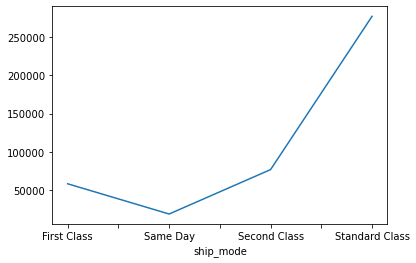

In [18]:
# Default is line plot
plotdata.plot()

<AxesSubplot:xlabel='ship_mode'>

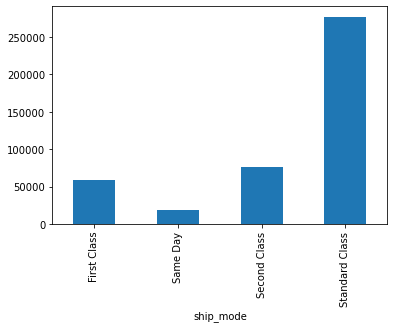

In [19]:
# Try bar plot
plotdata.plot(kind='bar')

# Try other kinds: barh, pie

<AxesSubplot:xlabel='ship_mode'>

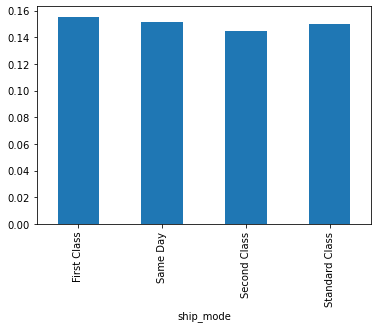

In [20]:
merged.groupby('ship_mode')['discount'].mean().plot(kind='bar')

ship_mode       category       
First Class     Furniture           358
                Office Supplies     881
                Technology          337
Same Day        Furniture           108
                Office Supplies     302
                Technology          123
Second Class    Furniture           469
                Office Supplies    1271
                Technology          459
Standard Class  Furniture          1478
                Office Supplies    3677
                Technology         1460
Name: order_id, dtype: int64


<AxesSubplot:xlabel='ship_mode,category'>

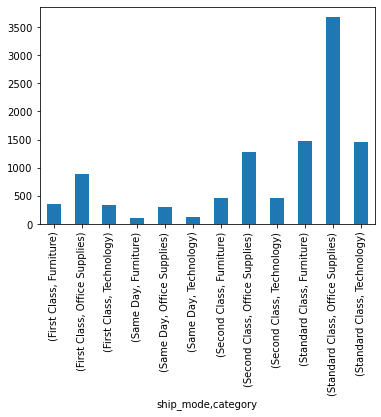

In [21]:
# Try to plot the multi level group:

plotdata=merged.groupby(['ship_mode','category'])['order_id'].count()
print(plotdata)
# adjust the plot size: what does this show us? will a bar plot be better?
plotdata.plot(kind='bar')

category        Furniture  Office Supplies  Technology
ship_mode                                             
First Class           358              881         337
Same Day              108              302         123
Second Class          469             1271         459
Standard Class       1478             3677        1460


<AxesSubplot:xlabel='ship_mode'>

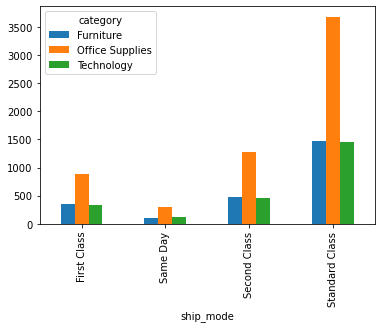

In [22]:
#unstack then plot
# Try to plot the multi level group:
plotdata=merged.groupby(['ship_mode','category'])['order_id'].count().unstack()
print(plotdata)

plotdata.plot(kind='bar')

## Wrap up

We've covered main data wrangling and cleaning tasks! Here are the key takeaways:

- **Missing data** comes in many shapes and sizes. Before deciding how to handle it, we identify it exists. We then derive how the missingness is affecting our dataset, and make a determination about how to fill in values.

```python
# pro tip for identifying missing data
df.isnull().sum()
```

- **Merging DataFrames** helps us to join datasets on a key column, similar to SQL joins. 

```
pd.merge(left, right, how='inner', on='indexlabel')
```

- **Groupby** statements are particularly useful for a subsection-of-interest analysis. Specifically, zooming in on one condition, and determining relevant statstics.

```python
# group by 
df.groupby('column').agg['count', 'mean', 'max', 'min']
```

- **Apply functions** help us clean values across an entire DataFrame column. They are *like* a for loop for cleaning, but many times more efficient. They follow a common pattern:
1. Write a function that works on a single value
2. Test that function on a single value
3. Apply that function to a whole column

(The most confusing part of apply functions is that we write them with *a single value* in mind, and then apply them to many single values at once.)

#### Review Exercises / Homework

Let's practice what we have learned in this unit. We want to analyse the returns from the orders.

Q1. Read in the file `returns.csv`, then merge the `merged` DataFrame with the `returns` to determine if there were any returns on each order. Name the new DataFrame `merged_returns`.


In [23]:
merged.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,...,category,sub_category,description,unit_cost,days_to_ship,order_year,order_month_no,order_day,order_day_name,margin_category
0,ID-2022-83625,2022-07-28,2022-07-31,Second Class,RS-19420,FUR-BO-10000008,465.156,2,0.400000,-255.864,...,Furniture,Bookcases,"Sauder Library with Doors, Traditional",360.51,3,2022,7,3,Thursday,Low
1,IN-2020-85480,2020-07-31,2020-02-08,First Class,CS-12490,FUR-BO-10000021,243.060,2,0.149847,102.060,...,Furniture,Bookcases,"Dania Corner Shelving, Metal",70.50,-174,2020,7,4,Friday,High
2,IN-2020-21206,2020-07-02,2020-12-02,Standard Class,SC-20800,FUR-BO-10000035,1236.330,3,0.000000,519.210,...,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,153,2020,7,3,Thursday,High
3,IN-2019-50060,2019-07-09,2019-09-14,Standard Class,MC-17575,FUR-BO-10000035,2472.660,6,0.149847,1038.420,...,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,67,2019,7,1,Tuesday,High
4,IN-2019-25889,2019-08-12,2019-12-12,Standard Class,BP-11185,FUR-BO-10000035,2596.293,7,0.100000,923.013,...,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,122,2019,8,0,Monday,High


In [25]:
# Q1 Answer 
returns = pd.read_csv('datasets/returns.csv')

In [26]:
merged_returns = pd.merge(merged, returns, how='left', on='order_id')
merged_returns.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,...,sub_category,description,unit_cost,days_to_ship,order_year,order_month_no,order_day,order_day_name,margin_category,returned
0,ID-2022-83625,2022-07-28,2022-07-31,Second Class,RS-19420,FUR-BO-10000008,465.156,2,0.400000,-255.864,...,Bookcases,"Sauder Library with Doors, Traditional",360.51,3,2022,7,3,Thursday,Low,NaN
1,IN-2020-85480,2020-07-31,2020-02-08,First Class,CS-12490,FUR-BO-10000021,243.060,2,0.149847,102.060,...,Bookcases,"Dania Corner Shelving, Metal",70.50,-174,2020,7,4,Friday,High,NaN
2,IN-2020-21206,2020-07-02,2020-12-02,Standard Class,SC-20800,FUR-BO-10000035,1236.330,3,0.000000,519.210,...,Bookcases,"Dania Classic Bookcase, Pine",239.04,153,2020,7,3,Thursday,High,NaN
3,IN-2019-50060,2019-07-09,2019-09-14,Standard Class,MC-17575,FUR-BO-10000035,2472.660,6,0.149847,1038.420,...,Bookcases,"Dania Classic Bookcase, Pine",239.04,67,2019,7,1,Tuesday,High,NaN
4,IN-2019-25889,2019-08-12,2019-12-12,Standard Class,BP-11185,FUR-BO-10000035,2596.293,7,0.100000,923.013,...,Bookcases,"Dania Classic Bookcase, Pine",239.04,122,2019,8,0,Monday,High,NaN


Q2. How many missing values are there in the `returned` column of `merged_returns`?



In [27]:
# Q2 Answer
merged_returns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10923 entries, 0 to 10922
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         10923 non-null  object 
 1   order_date       10923 non-null  object 
 2   ship_date        10923 non-null  object 
 3   ship_mode        10923 non-null  object 
 4   customer_id      10923 non-null  object 
 5   product_id       10923 non-null  object 
 6   sales            10923 non-null  float64
 7   quantity         10923 non-null  int64  
 8   discount         10923 non-null  float64
 9   profit           10923 non-null  float64
 10  profit_margin    10923 non-null  float64
 11  category         10923 non-null  object 
 12  sub_category     10923 non-null  object 
 13  description      10923 non-null  object 
 14  unit_cost        10923 non-null  float64
 15  days_to_ship     10923 non-null  int64  
 16  order_year       10923 non-null  int64  
 17  order_month_

Q3. Check the value_counts() of the `returned` column, with kwarg `dropna=False`.

In [28]:
# Q3 Answer
merged_returns['returned'].value_counts()


Yes    785
Name: returned, dtype: int64

Q4. Fill the missing values in the `returned` column of the new `merged_returns` DataFrame with `'No'` 
Once you are satisfied it is correct, you can set `inplace=True`. 
You can run your answer to Q3 again to check the value counts after filling!

In [29]:
# Q4 Answer
merged_returns['returned'].fillna(value='No').value_counts()


No     10138
Yes      785
Name: returned, dtype: int64

In [30]:
merged_returns['returned'].fillna(value='No', inplace=True)

In [31]:
merged_returns.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,...,sub_category,description,unit_cost,days_to_ship,order_year,order_month_no,order_day,order_day_name,margin_category,returned
0,ID-2022-83625,2022-07-28,2022-07-31,Second Class,RS-19420,FUR-BO-10000008,465.156,2,0.400000,-255.864,...,Bookcases,"Sauder Library with Doors, Traditional",360.51,3,2022,7,3,Thursday,Low,No
1,IN-2020-85480,2020-07-31,2020-02-08,First Class,CS-12490,FUR-BO-10000021,243.060,2,0.149847,102.060,...,Bookcases,"Dania Corner Shelving, Metal",70.50,-174,2020,7,4,Friday,High,No
2,IN-2020-21206,2020-07-02,2020-12-02,Standard Class,SC-20800,FUR-BO-10000035,1236.330,3,0.000000,519.210,...,Bookcases,"Dania Classic Bookcase, Pine",239.04,153,2020,7,3,Thursday,High,No
3,IN-2019-50060,2019-07-09,2019-09-14,Standard Class,MC-17575,FUR-BO-10000035,2472.660,6,0.149847,1038.420,...,Bookcases,"Dania Classic Bookcase, Pine",239.04,67,2019,7,1,Tuesday,High,No
4,IN-2019-25889,2019-08-12,2019-12-12,Standard Class,BP-11185,FUR-BO-10000035,2596.293,7,0.100000,923.013,...,Bookcases,"Dania Classic Bookcase, Pine",239.04,122,2019,8,0,Monday,High,No


Q5. Now that we have the `returned` column in the `merged_returns` DataFrame, use a groupby() to compare the mean sales for orders which were returned and those which were not.

In [32]:
# Q5 Answer
merged_returns.groupby('returned')['sales'].mean()


returned
No     325.128369
Yes    338.145324
Name: sales, dtype: float64

Q6. Use a multi-level groupby to compare the orders by `returned`, `category` then `ship_mode`. Return the means for all numeric columns. 

In [33]:
# Q6 Answer
merged_returns.groupby(['returned', 'category','ship_mode']).mean()

sales  quantity  discount  \
returned category        ship_mode                                        
No       Furniture       First Class     529.076212  3.725857  0.146385   
                         Same Day        453.840259  3.598039  0.145588   
                         Second Class    513.152226  3.655814  0.143162   
                         Standard Class  583.623580  3.780364  0.142668   
         Office Supplies First Class     135.098406  3.719753  0.171926   
                         Same Day        139.887590  3.585106  0.162163   
                         Second Class    140.315702  3.672370  0.153037   
                         Standard Class  142.661795  3.770839  0.163340   
         Technology      First Class     579.872649  3.620579  0.149100   
                         Same Day        532.312659  3.991453  0.161282   
                         Second Class    560.680524  3.916667  0.134714   
                         Standard Class  570.463871  3.720913  0.138454   
Yes      Furniture       First Class     405.767708  3.702703  0.045405   
                         Same Day        901.518200  3.166667  0.028333   
                         Second Class    713.692100  4.358974  0.125641   
                         Standard Class  458.131392  3.825243  0.088639   
         Office Supplies First Class     222.937441  4.084507  0.113521   
                         Same Day        184.833840  4.500000  0.045500   
                         Second Class    134.129759  3.715686  0.113431   
                         Standard Class  181.470576  4.042735  0.117820   
         Technology      First Class     309.873808  2.961538  0.096154   
                         Same Day        816.582300  2.666667  0.011667   
                         Second Class    493.094731  3.743590  0.124103   
                         Standard Class  609.240662  4.019608  0.095097   

                                             profit  profit_margin  \
returned category        ship_mode                                   
No       Furniture       First Class      42.613502       0.085463   
                         Same Day         45.619082       0.104314   
                         Second Class     33.524436       0.072163   
                         Standard Class   55.961457       0.078294   
         Office Supplies First Class      13.504443       0.037099   
                         Same Day         11.572484       0.058298   
                         Second Class     18.186352       0.070470   
                         Standard Class   16.847668       0.051104   
         Technology      First Class      88.540752       0.070740   
                         Same Day         62.237787       0.066752   
                         Second Class     78.872452       0.097810   
                         Standard Class   83.027538       0.076377   
Yes      Furniture       First Class      57.407708       0.170811   
                         Same Day        295.993200       0.311667   
                         Second Class     48.376715       0.097692   
                         Standard Class   85.695082       0.156990   
         Office Supplies First Class      34.343075       0.077042   
                         Same Day         37.434840       0.249000   
                         Second Class     14.032994       0.104314   
                         Standard Class   27.610447       0.091880   
         Technology      First Class      54.229962       0.113077   
                         Same Day        142.737300       0.213333   
                         Second Class    116.752423       0.110513   
                         Standard Class  138.656250       0.140686   

                                          unit_cost  days_to_ship  \
returned category        ship_mode                                  
No       Furniture       First Class     134.874112      1.950156   
                         Same Day        111.514118      0.303922  

Q7. Write a function called `discount_level` that receives a value `discount` and returns a string based on the following:
if the discount is 0.0, then return 'None', otherwise if discount is greater than 0.2, return 'High'. Any other value is considered 'Low'.


In [34]:
#Q7 Answer
def discount_level(discount):
    if discount == 0.0:
        return 'None'
    elif discount > 0.2:
        return 'High'
    else:
        return 'Low'

In [35]:
discount_level(0.2)

'Low'

Q8. Apply the function `discount_level` to the `discount` column of `merged_returns` to create a new column.

In [36]:
# Q8 Anwer
merged_returns['discount'].apply(discount_level)

0        High
1         Low
2        None
3         Low
4         Low
         ... 
10918     Low
10919    None
10920    None
10921    High
10922    None
Name: discount, Length: 10923, dtype: object

In [37]:
merged_returns['discount_level'] = merged_returns['discount'].apply(discount_level)

In [38]:
merged_returns.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,...,description,unit_cost,days_to_ship,order_year,order_month_no,order_day,order_day_name,margin_category,returned,discount_level
0,ID-2022-83625,2022-07-28,2022-07-31,Second Class,RS-19420,FUR-BO-10000008,465.156,2,0.400000,-255.864,...,"Sauder Library with Doors, Traditional",360.51,3,2022,7,3,Thursday,Low,No,High
1,IN-2020-85480,2020-07-31,2020-02-08,First Class,CS-12490,FUR-BO-10000021,243.060,2,0.149847,102.060,...,"Dania Corner Shelving, Metal",70.50,-174,2020,7,4,Friday,High,No,Low
2,IN-2020-21206,2020-07-02,2020-12-02,Standard Class,SC-20800,FUR-BO-10000035,1236.330,3,0.000000,519.210,...,"Dania Classic Bookcase, Pine",239.04,153,2020,7,3,Thursday,High,No,None
3,IN-2019-50060,2019-07-09,2019-09-14,Standard Class,MC-17575,FUR-BO-10000035,2472.660,6,0.149847,1038.420,...,"Dania Classic Bookcase, Pine",239.04,67,2019,7,1,Tuesday,High,No,Low
4,IN-2019-25889,2019-08-12,2019-12-12,Standard Class,BP-11185,FUR-BO-10000035,2596.293,7,0.100000,923.013,...,"Dania Classic Bookcase, Pine",239.04,122,2019,8,0,Monday,High,No,Low


Q9. Using `groupby()` and `count()`, visualize the number of orders that were returned and not returned based on the new discount level with a suitable plot. 


In [43]:
#Q9 answer
merged_returns.groupby('returned')['discount'].agg(['count','mean','max','min'])

,count,mean,max,min
returned,,,,
No,10138,0.153450,0.80,0.0
Yes,785,0.103312,0.57,0.0


discount_level
High    3044
Low     3274
None    4605
Name: returned, dtype: int64


<AxesSubplot:xlabel='discount_level'>

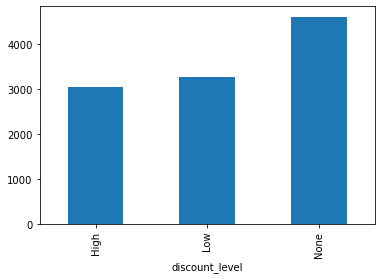

In [45]:
plotdata2=merged_returns.groupby('discount_level')['returned'].count()
print(plotdata2)

plotdata2.plot(kind='bar')

Q10. Congratulations! Save the `merged_returns` file as 'returned_orders.csv'.
    

In [46]:
# Q10 Answer
merged_returns.to_csv('datasets/returned_orders.csv', index=False)